In [1]:
import sys
module_path = os.path.abspath('..')
sys.path.append(module_path)
from lc.measurements import CurveMeasurements
from lc.variance import ErrorMeanVarianceEstimator
import matplotlib
import matplotlib.pyplot as plt

Load error measurements using `CurveMeasurements`. See `notebooks/measurements.ipynb` for more about reading error measurements.  

In [2]:
curvems = CurveMeasurements()
curvems.load_from_json('../data/no_pretr_ft.json')
print(curvems)

--
num_train_samples: 25
test_errors: [74.04, 74.48, 74.07, 74.4, 75.95, 74.97, 74.02, 75.8, 74.6, 74.27]
num_ms: 10
--
num_train_samples: 50
test_errors: [57.59, 58.45, 58.13, 58.44, 59.46, 58.14, 58.71, 58.22]
num_ms: 8
--
num_train_samples: 100
test_errors: [45.01, 43.64, 45.06, 44.63]
num_ms: 4
--
num_train_samples: 200
test_errors: [35.36, 35.2]
num_ms: 2
--
num_train_samples: 400
test_errors: [27.92]
num_ms: 1
--



`ErrorMeanVarianceEstimator` computes the mean and variance estimates needed for computing a learning curve. Two kinds of variances are computed for each train set size -
- `variance`: unbiased sample variance of errors
- `smoothed_variance`: variance estimated by fitting $v_0 + v_1/n$ to sample variances. Here, $n$ denotes the number of training samples. We set $v_0$, the variance at infinite training samples, to a small value such as $0.01$ and then estimate $v_1$ using a weighted least squares fit. Since variance of sample variance is inversely proportional to $N-1$, where $N$ is the number of samples used to compute the sample variance, we use `num_ms`$-1$ as weights. 

In [3]:
err_mean_var_estimator = ErrorMeanVarianceEstimator(v_0=0.01)
err_mean_var_estimator.estimate(curvems)
print(curvems)

--
num_train_samples: 25
test_errors: [74.04, 74.48, 74.07, 74.4, 75.95, 74.97, 74.02, 75.8, 74.6, 74.27]
num_ms: 10
mean: 74.66
variance: 0.4953
smoothed_variance: 0.5283
--
num_train_samples: 50
test_errors: [57.59, 58.45, 58.13, 58.44, 59.46, 58.14, 58.71, 58.22]
num_ms: 8
mean: 58.3925
variance: 0.2932
smoothed_variance: 0.2692
--
num_train_samples: 100
test_errors: [45.01, 43.64, 45.06, 44.63]
num_ms: 4
mean: 44.585
variance: 0.4338
smoothed_variance: 0.1396
--
num_train_samples: 200
test_errors: [35.36, 35.2]
num_ms: 2
mean: 35.28
variance: 0.0128
smoothed_variance: 0.0748
--
num_train_samples: 400
test_errors: [27.92]
num_ms: 1
mean: 27.92
smoothed_variance: 0.0424
--



In [4]:
print('v_0:',err_mean_var_estimator.v_0)
print('v_1:',err_mean_var_estimator.v_1)

v_0: 0.01
v_1: 12.9577


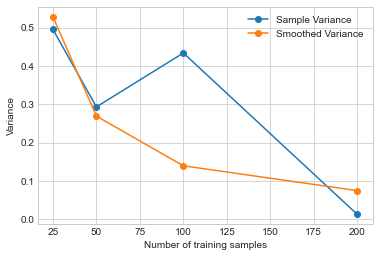

In [5]:
err_mean_var_estimator.visualize(curvems)